In [23]:
# Importing the required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load the dataset into a pandas dataframe
data = pd.read_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\Cleaned_Dataset.csv')

# Creating a DataFrame with the loaded data
df = pd.DataFrame(data)

# checking the dataframe
df

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,26.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,...,67.0,0.0,1,0.3420,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,9542.0,Angola,26.0,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,...,44.0,0.0,1,0.4760,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,1617.0,Benin,26.0,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,...,53.0,0.0,1,0.4540,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,4276.0,Botswana,26.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,...,49.0,0.1,1,0.3830,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,1041.0,Burkina Faso,26.0,14338.0,2.610959e+09,0.051,12.0,0.096,0.0,...,49.0,0.0,1,0.4680,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,8529.0,Turks and Caicos Islands,26.0,14338.0,1.507975e+10,0.061,193.0,0.020,0.1,...,69.0,0.5,1,0.2995,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08
2700,0.013,8529.0,United States,5.0,2132446.0,1.624460e+13,0.179,8895.0,0.006,0.8,...,76.0,1.0,1,0.1960,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,8529.0,Uruguay,7.0,14338.0,5.000435e+10,0.089,1308.0,0.010,0.5,...,74.0,1.5,1,0.2200,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,8529.0,"Venezuela, RB",144.0,14338.0,3.812862e+11,0.046,593.0,0.013,0.5,...,72.0,1.0,1,0.2880,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [25]:
# Function to calculate number of outliers in a column
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Apply the function to each numeric column in the DataFrame
outlier_counts = df.select_dtypes(include=[np.number]).apply(count_outliers)

print(outlier_counts)


Birth Rate                  0
CO2 Emissions             387
Days to Start Business    340
Energy Usage              424
GDP                       414
Health Exp % GDP           58
Health Exp/Capita         412
Infant Mortality Rate      49
Internet Usage              0
Lending Interest          245
Life Expectancy Female     14
Life Expectancy Male       11
Mobile Phone Usage         11
Number of Records           0
Population 0-14             0
Population 15-64            9
Population 65+              5
Population Total          318
Population Urban            0
Tourism Inbound           409
Tourism Outbound          461
dtype: int64


In [26]:
df_copy = df.copy()

# Store the columns to be dropped in a variable
columns_to_drop = ['Birth Rate', 'Country', 'Internet Usage','Number of Records' ,'Population 0-14' ,'Population Urban']

# Drop the columns from the copied DataFrame and store in a new DataFrame
df_dropped = df_copy[columns_to_drop]
df_copy = df_copy.drop(columns_to_drop, axis=1)

# Define a function to calculate the upper and lower fences for each column
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    return Lower_Fence, Upper_Fence

# Define a function to recode the outliers in each column
def recode_outliers(x):
    lower_fence, upper_fence = iqr_fence(x)
    x[x < lower_fence] = lower_fence
    x[x > upper_fence] = upper_fence
    return x

# Apply the function to each column to recode the outliers
for column in df_copy.columns:
    if np.issubdtype(df_copy[column].dtype, np.number):  # only apply to numeric columns
        df_copy[column] = recode_outliers(df_copy[column])

# Add the dropped columns back into the DataFrame
df = pd.concat([df_copy, df_dropped], axis=1)

columns_to_drop = ['Country', 'Number of Records']

# Drop the columns from the copied DataFrame
df = df.drop(columns_to_drop, axis=1)

# Save the final DataFrame to a CSV file
df.to_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\IQR.csv', index=False)



In [27]:
# Function to check if a column is symmetric
def is_symmetric(column):
    skewness = column.skew()
    return abs(skewness) < 0.1

# Apply the function to each numeric column in the DataFrame
symmetry_check = df.select_dtypes(include=[np.number]).apply(is_symmetric)

print(symmetry_check)


CO2 Emissions             False
Days to Start Business    False
Energy Usage              False
GDP                       False
Health Exp % GDP          False
Health Exp/Capita         False
Infant Mortality Rate     False
Lending Interest          False
Life Expectancy Female    False
Life Expectancy Male      False
Mobile Phone Usage        False
Population 15-64          False
Population 65+            False
Population Total          False
Tourism Inbound           False
Tourism Outbound          False
Birth Rate                False
Internet Usage            False
Population 0-14            True
Population Urban           True
dtype: bool


In [28]:
df_normalized = df

In [29]:
# Function to check if a column is symmetric
def is_symmetric(column):
    skewness = column.skew()
    return abs(skewness) < 0.1

# Apply the function to each numeric column in the DataFrame
symmetry_check = df.select_dtypes(include=[np.number]).apply(is_symmetric)

print(symmetry_check)

CO2 Emissions             False
Days to Start Business    False
Energy Usage              False
GDP                       False
Health Exp % GDP          False
Health Exp/Capita         False
Infant Mortality Rate     False
Lending Interest          False
Life Expectancy Female    False
Life Expectancy Male      False
Mobile Phone Usage        False
Population 15-64          False
Population 65+            False
Population Total          False
Tourism Inbound           False
Tourism Outbound          False
Birth Rate                False
Internet Usage            False
Population 0-14            True
Population Urban           True
dtype: bool


In [30]:
# K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)
labels_kmeans = kmeans.labels_
print("K-Means labels:")
print(labels_kmeans)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(df_normalized)
print("\nAgglomerative Clustering labels:")
print(labels_agg)

# DBSCAN
dbscan = DBSCAN(eps=0.3)
labels_dbscan = dbscan.fit_predict(df_normalized)
print("\nDBSCAN labels:")
print(labels_dbscan)


K-Means labels:
[0 2 2 ... 2 1 2]

Agglomerative Clustering labels:
[0 0 0 ... 0 2 0]

DBSCAN labels:
[-1 -1 -1 ... -1 -1 -1]


In [31]:
fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],  # assuming the DataFrame has at least three columns
    y=df_normalized.iloc[:, 1],
    z=df_normalized.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_kmeans,  # set color to the K-Means cluster labels
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
))

fig.show()


In [32]:
fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],
    y=df_normalized.iloc[:, 1],
    z=df_normalized.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_agg,  # set color to the Agglomerative Clustering labels
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.show()


In [33]:
fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],
    y=df_normalized.iloc[:, 1],
    z=df_normalized.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_dbscan,  # set color to the DBSCAN labels
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.show()


In [34]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_normalized)
    sse.append(km.inertia_)

fig = go.Figure(data=go.Scatter(x=list_k, y=sse, mode='lines+markers'))
fig.update_layout(title='Elbow Method', xaxis_title='Number of clusters k', yaxis_title='Sum of squared distance')
fig.show()


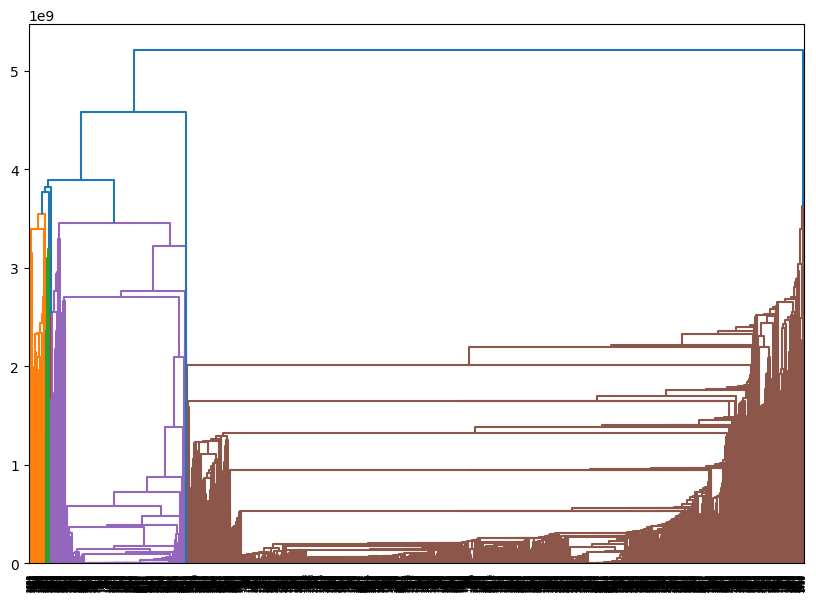

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(df_normalized, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


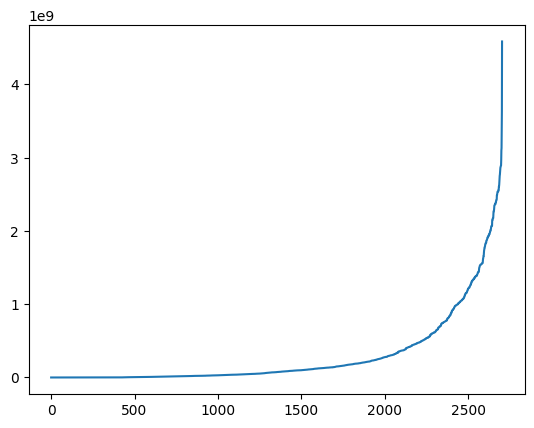

In [36]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_normalized)
distances, indices = nbrs.kneighbors(df_normalized)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

# Assuming 'df_normalized' is your DataFrame

# K-Means
kmeans = KMeans(n_clusters=3)
labels_kmeans = kmeans.fit_predict(df_normalized)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(df_normalized)

# DBSCAN
dbscan = DBSCAN(eps=0.2)
labels_dbscan = dbscan.fit_predict(df_normalized)

# Calculate metrics
for name, labels in zip(['K-Means', 'Agglomerative', 'DBSCAN'], [labels_kmeans, labels_agg, labels_dbscan]):
    print(f"\n{name}:")
    print(f"Silhouette Score: {metrics.silhouette_score(df_normalized, labels)}")
    print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df_normalized, labels)}")
    print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df_normalized, labels)}")



K-Means:
Silhouette Score: 0.8050162917770319
Calinski-Harabasz Index: 36203.8517389373
Davies-Bouldin Index: 0.3698705976143643

Agglomerative:
Silhouette Score: 0.8144342532640374
Calinski-Harabasz Index: 25306.86347783994
Davies-Bouldin Index: 0.3353241928660271

DBSCAN:
Silhouette Score: -0.6458818542087391
Calinski-Harabasz Index: 194.3538821262622
Davies-Bouldin Index: 0.8569498496989956


In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

# Assuming 'df_normalized' is your DataFrame

# K-Means
kmeans = KMeans(n_clusters=5)
labels_kmeans = kmeans.fit_predict(df_normalized)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
labels_agg = agg.fit_predict(df_normalized)

# DBSCAN
dbscan = DBSCAN(eps=0.3)
labels_dbscan = dbscan.fit_predict(df_normalized)

# Calculate metrics
for name, labels in zip(['K-Means', 'Agglomerative', 'DBSCAN'], [labels_kmeans, labels_agg, labels_dbscan]):
    print(f"\n{name}:")
    print(f"Silhouette Score: {metrics.silhouette_score(df_normalized, labels)}")
    print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df_normalized, labels)}")
    print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df_normalized, labels)}")



K-Means:
Silhouette Score: 0.7374293171609122
Calinski-Harabasz Index: 54227.00131543987
Davies-Bouldin Index: 0.4391694902690467

Agglomerative:
Silhouette Score: 0.7548397822508105
Calinski-Harabasz Index: 45608.77481304922
Davies-Bouldin Index: 0.40451630012172907

DBSCAN:
Silhouette Score: -0.6458818542087391
Calinski-Harabasz Index: 194.3538821262622
Davies-Bouldin Index: 0.8569498496989956


In [39]:
from sklearn.mixture import GaussianMixture

# Assuming `df` is your DataFrame
gmm = GaussianMixture(n_components=3)
gmm.fit(df_normalized)

# Predict the cluster for each data point
labels_gmm = gmm.predict(df_normalized)


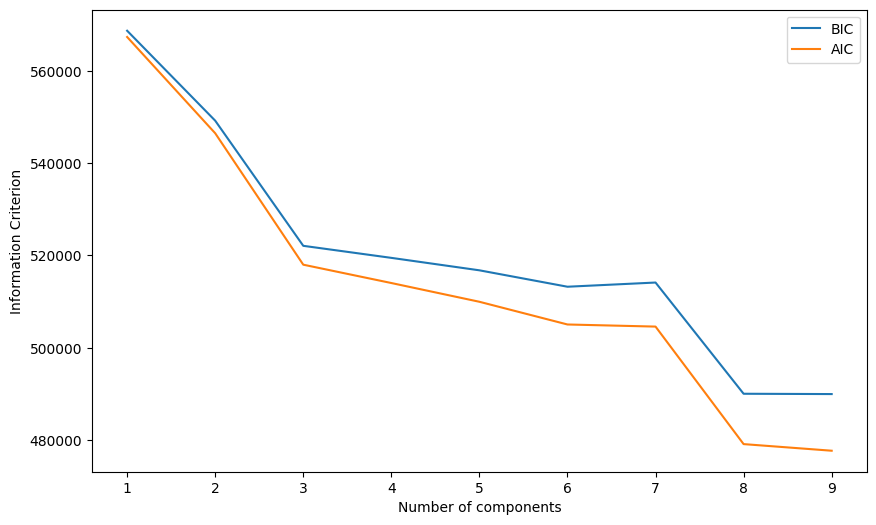

In [40]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming `df` is your DataFrame
n_components = range(1, 10)  # Adjust range as needed
bics = []
aics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(df)
    bics.append(gmm.bic(df))
    aics.append(gmm.aic(df))

plt.figure(figsize=(10, 6))
plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.legend()
plt.show()


In [41]:
from sklearn.mixture import GaussianMixture

# Assuming `df` is your DataFrame
gmm = GaussianMixture(n_components=4)
gmm.fit(df_normalized)

# Predict the cluster for each data point
labels_gmm = gmm.predict(df_normalized)


In [42]:
from sklearn import metrics

# Assuming `labels_gmm` are the labels predicted by your GMM
print(f"Silhouette Score: {metrics.silhouette_score(df, labels_gmm)}")
print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df, labels_gmm)}")
print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df, labels_gmm)}")


Silhouette Score: 0.28481859232140583
Calinski-Harabasz Index: 5095.486399083954
Davies-Bouldin Index: 1.0430529433753188


In [43]:
wss=[]
for i in range(2,6):
  k_means=KMeans(n_clusters=i,init='random',n_init='auto',algorithm='lloyd')
  k_means.fit(df_normalized)
  wss.append(k_means.inertia_)
  print(metrics.silhouette_score(df_normalized,k_means.labels_))

0.848852771216648
0.8050162917770319
0.7582480682442636
0.6402058828818387


In [44]:
met={'euclidean', 'yule', 'braycurtis', 'dice', 'chebyshev',
       'jaccard', 'canberra', 'russellrao', 'l2',
      'manhattan', 'rogerstanimoto',
     'cityblock', 'l1', 'haversine', 'sqeuclidean', 'hamming', 'cosine',
     'sokalsneath', 'sokalmichener'}
score=0
for met in met:
  hc=AgglomerativeClustering(n_clusters=2,metric=met,linkage='single')
  y_hc=hc.fit_predict(df_normalized)
  y=metrics.silhouette_score(df_normalized,y_hc)
  if(score<y):
    score=y
    print("for {} metrics ".format(met)+" "+"sil score is {} ".format(metrics.silhouette_score(df_normalized,y_hc)))

for euclidean metrics  sil score is 0.842379431774448 


In [45]:
linkage = [ 'complete', 'average', 'single']
met=['euclidean','canberra','braycurtis','chebyshev','manhattan']
score=0
for met in met:
  for link in linkage:
    hc=AgglomerativeClustering(n_clusters=3,metric=met,linkage=link)
    y_hc=hc.fit_predict(df_normalized)
    y=metrics.silhouette_score(df_normalized,y_hc)
    if(score<y):
     score=y
     print(link)
     print("for {} metrics ".format(met)+" "+"sil score is {} ".format(metrics.silhouette_score(df_normalized,y_hc)))

complete
for euclidean metrics  sil score is 0.7708365630307115 
average
for euclidean metrics  sil score is 0.8065857616912226 
average
for manhattan metrics  sil score is 0.8199403361961393 


In [46]:
score=0
for clus in range(2,10):
  hc=AgglomerativeClustering(n_clusters=clus,metric='chebyshev',linkage='average')
  y_hc=hc.fit_predict(df_normalized)
  y=metrics.silhouette_score(df_normalized,y_hc)
  if(score<y):
    score=y
  print("for {} cluster ".format(clus)+" "+"sil score is {} ".format(metrics.silhouette_score(df_normalized,y_hc)))

for 2 cluster  sil score is 0.8374930329862338 
for 3 cluster  sil score is 0.7932913082481162 
for 4 cluster  sil score is 0.7495986150534134 
for 5 cluster  sil score is 0.7570412892778878 
for 6 cluster  sil score is 0.7468135854912998 
for 7 cluster  sil score is 0.7441055639732017 
for 8 cluster  sil score is 0.6963838059295421 
for 9 cluster  sil score is 0.6995408507810708 


In [47]:
epsl=[0.3,0.4,0.5,0.8,0.9]
score=0
for ep in epsl:
  for sample in range(2,12):
    dbscan=DBSCAN(eps=ep,min_samples=sample)
    dbscan.fit(df_normalized)
    if(score < metrics.silhouette_score(df_normalized,dbscan.labels_)):
      score=metrics.silhouette_score(df_normalized,dbscan.labels_)
      print(str("for eps {} ".format(ep))+str("and  min_sample {} ".format(sample))+" silhouette score is {}" .format(metrics.silhouette_score(df_normalized,dbscan.labels_)))

for eps 0.3 and  min_sample 7  silhouette score is 0.49202357936413166


In [48]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

# Assuming 'df_normalized' is your DataFrame

# K-Means
kmeans = KMeans(n_clusters=2)
labels_kmeans = kmeans.fit_predict(df_normalized)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(df_normalized)

# DBSCAN
dbscan = DBSCAN(eps=0.9)
labels_dbscan = dbscan.fit_predict(df_normalized)

# Calculate metrics
for name, labels in zip(['K-Means', 'Agglomerative', 'DBSCAN'], [labels_kmeans, labels_agg, labels_dbscan]):
    print(f"\n{name}:")
    print(f"Silhouette Score: {metrics.silhouette_score(df_normalized, labels)}")
    print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df_normalized, labels)}")
    print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df_normalized, labels)}")



K-Means:
Silhouette Score: 0.848852771216648
Calinski-Harabasz Index: 24090.68640719922
Davies-Bouldin Index: 0.24241059973015305

Agglomerative:
Silhouette Score: 0.8425373147274026
Calinski-Harabasz Index: 22610.490681691852
Davies-Bouldin Index: 0.274752512353937

DBSCAN:
Silhouette Score: -0.6458818542087391
Calinski-Harabasz Index: 194.3538821262622
Davies-Bouldin Index: 0.8569498496989956
